## 범주형 데이터 이진분류
### 7.1 경진대회 이해
- https://www.kaggle.com/competitions/cat-in-the-dat
- 경진대회명 : 범주형 데이터 이진분류 경진대회
- 미션 : 다양한 범주형 데이터를 활용해 타깃값 1에 속할 확률 예측
- 문제 유형 : 이진분류
- 평가지표 : ROC AUC
- 제공되는 데이터는 모두 범주형
    - 순서형 데이터 : ord_로 시작
    - 명목형 데이터 : nom_로 시작
    - 이진 데이터 : bin_로 시작
    - 날짜 데이터 : day, month

#### 7.2.1 데이터 둘러보기

In [3]:
import pandas as pd

data_path = 'C:/Users/hyebin.hyebin/Desktop/python/kaggle_dataset/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv', index_col = 'id')
test = pd.read_csv(data_path + 'test.csv', index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col = 'id')

In [4]:
train.shape, test.shape

((300000, 24), (200000, 23))

In [5]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [6]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


In [7]:
test.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
300003,0,0,1,T,Y,Red,Star,Cat,China,Piano,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
300004,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


##### 피처 요약표 만들기


In [8]:
pd.DataFrame(train.dtypes[:5], columns = ['데이터 타입']) # 데이터 타입 반환
(pd.DataFrame(train.dtypes[:5])).reset_index() # 데이터 타입 반환

,index,0
0,bin_0,int64
1,bin_1,int64
2,bin_2,int64
3,bin_3,object
4,bin_4,object


In [9]:
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns = {'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary

In [10]:
resumetable(train)

데이터셋 형상 : (300000, 24)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


- 이진 피처
    - bin_0, bin_1, bin_2 : 0, 1
    - bin_3 : T, F -> T:1, F:0으로 인코딩
    - bin_4 : Y, N -> Y:1, N:0으로 인코딩

- 명목형 피처
    - nom_0 ~ nom_4 : 고윳값 개수가 적음
    - nom_5 ~ nom_9 : 고윳값 개수가 많음

In [11]:
for i in range(6):
    feature = 'ord_'+ str(i)
    print(f'{feature} 고윳값 : {train[feature].unique()}')

ord_0 고윳값 : [2 1 3]
ord_1 고윳값 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']
ord_3 고윳값 : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값 : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값 : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'N

- 순서형 피처
    - ord_0 : 1, 2, 3
    - ord_1 : 캐글 등급, Novice -> Contributor -> Expert -> Master -> Grandmaster
    - ord_2 : 추운 정도, Freezing -> Cold -> Warm -> Hot -> Boiling Hot -> Lava Hot
    - ord_3 ~ ord_5 : 알파벳 순

In [12]:
print('day 고윳값 : ', train['day'].unique())
print('month 고윳값 : ', train['month'].unique())
print('target 고윳값 : ', train['target'].unique())

day 고윳값 :  [2 7 5 4 3 1 6]
month 고윳값 :  [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값 :  [0 1]


#### 7.2.2 데이터 시각화

In [13]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

##### 타깃값 분포

Text(0.5, 1.0, 'Target Distribution')

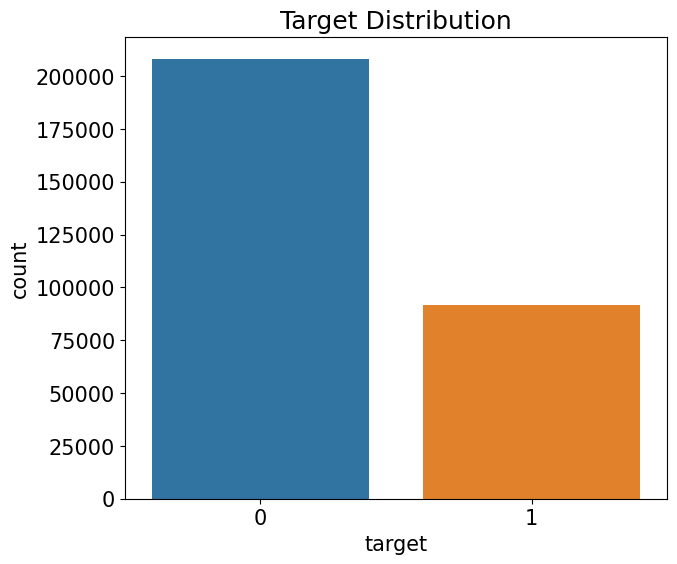

In [14]:
mpl.rc('font', size = 15)
plt.figure(figsize = (7, 6))

ax = sns.countplot(x = 'target', data = train)
ax.set_title('Target Distribution')

In [15]:
ax.patches

<Axes.ArtistList of 2 patches>

In [16]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()         # 도형 높이(데이터 개수)
        width = patch.get_width()           # 도형 너비
        left_coord = patch.get_x()          # 도형 왼쪽 테두리의 x축 위치
        percent = height / total_size * 100 # 타깃값 비율

    # (x, y) 좌표에 텍스트 입력 
        ax.text(x = left_coord + width / 2.0,    # x축 위치
                y = height + total_size * 0.001, # y축 위치
                s = f'{percent:1.1f}%',          # 입력 텍스트
                ha = 'center'                    # 가운데 정렬
            )

Text(0.5, 1.0, 'Target Distribution')

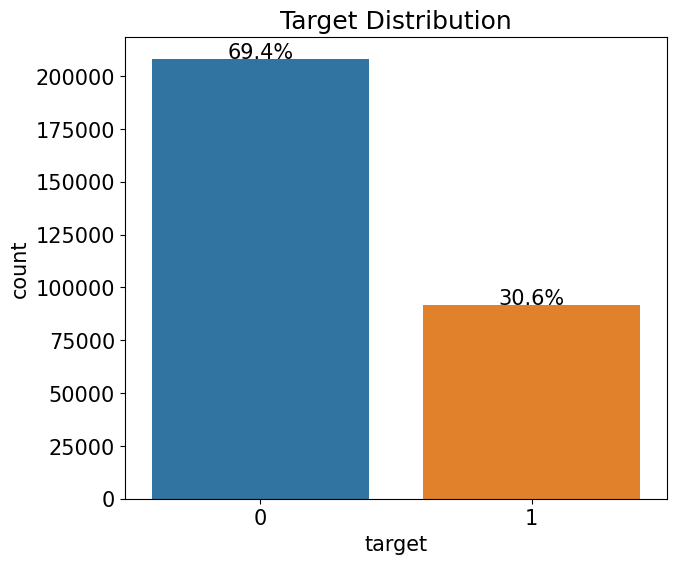

In [17]:
plt.figure(figsize = (7, 6))

ax = sns.countplot(x = 'target', data = train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')

##### 이진 피처 분포

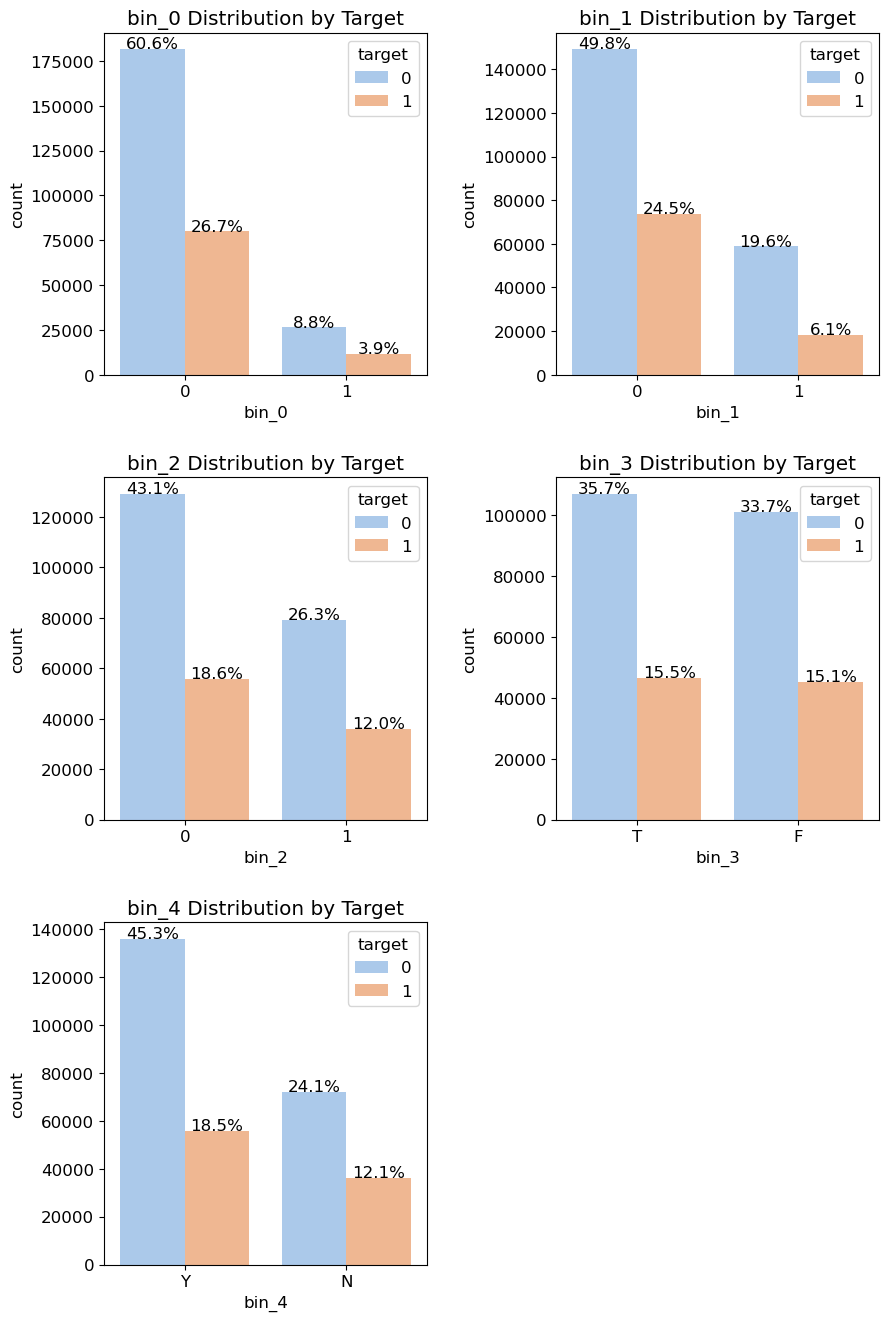

In [18]:
import matplotlib.gridspec as gridspec

mpl.rc('font', size = 12)
grid = gridspec.GridSpec(3, 2)
plt.figure(figsize = (10, 16))
plt.subplots_adjust(wspace = 0.4, hspace = 0.3) # 서브플롯 간 좌우/상하 여백 설정

bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])

    sns.countplot(x = feature, data = train, hue = 'target', palette = 'pastel', ax = ax)

    ax.set_title(f'{feature} Distribution by Target')
    write_percent(ax, len(train))

##### 명목형 피처 분포

##### 1) 교차분석표 생성 함수 만들기

In [19]:
pd.crosstab(train['nom_0'], train['target']) # 고윳값 별 타깃값의 개수

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [20]:
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize = 'index')  * 100
crosstab 

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [21]:
crosstab = crosstab.reset_index()
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [22]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize = 'index')  * 100
    crosstab = crosstab.reset_index()

    return crosstab

In [23]:
crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


##### 2) 포인트플롯 생성 함수 만들기

In [30]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성

    ax2 = sns.pointplot(x = feature, y = 1, data = crosstab, order = crosstab[feature].values, color = 'black') 
    ax2.set_ylim(crosstab[1].min() - 5, crosstab[1].max() * 1.1) # y축 범위 설정
    ax.set_ylabel('Target 1 Ratio(%)')

##### 3) 피처 분포도 및 피처 별 타깃값 1의 비율 포인트플롯 생성 함수 만들기

In [31]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size = (15, 20)):
    plt.figure(figsize = size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace = 0.45, hspace = 0.3)

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)

        sns.countplot(x = feature, data = df, order = crosstab[feature].values, color = 'skyblue', ax = ax)

        write_percent(ax, len(df))
        plot_pointplot(ax, feature, crosstab)
        ax.set_title(f'{feature} Distribution')

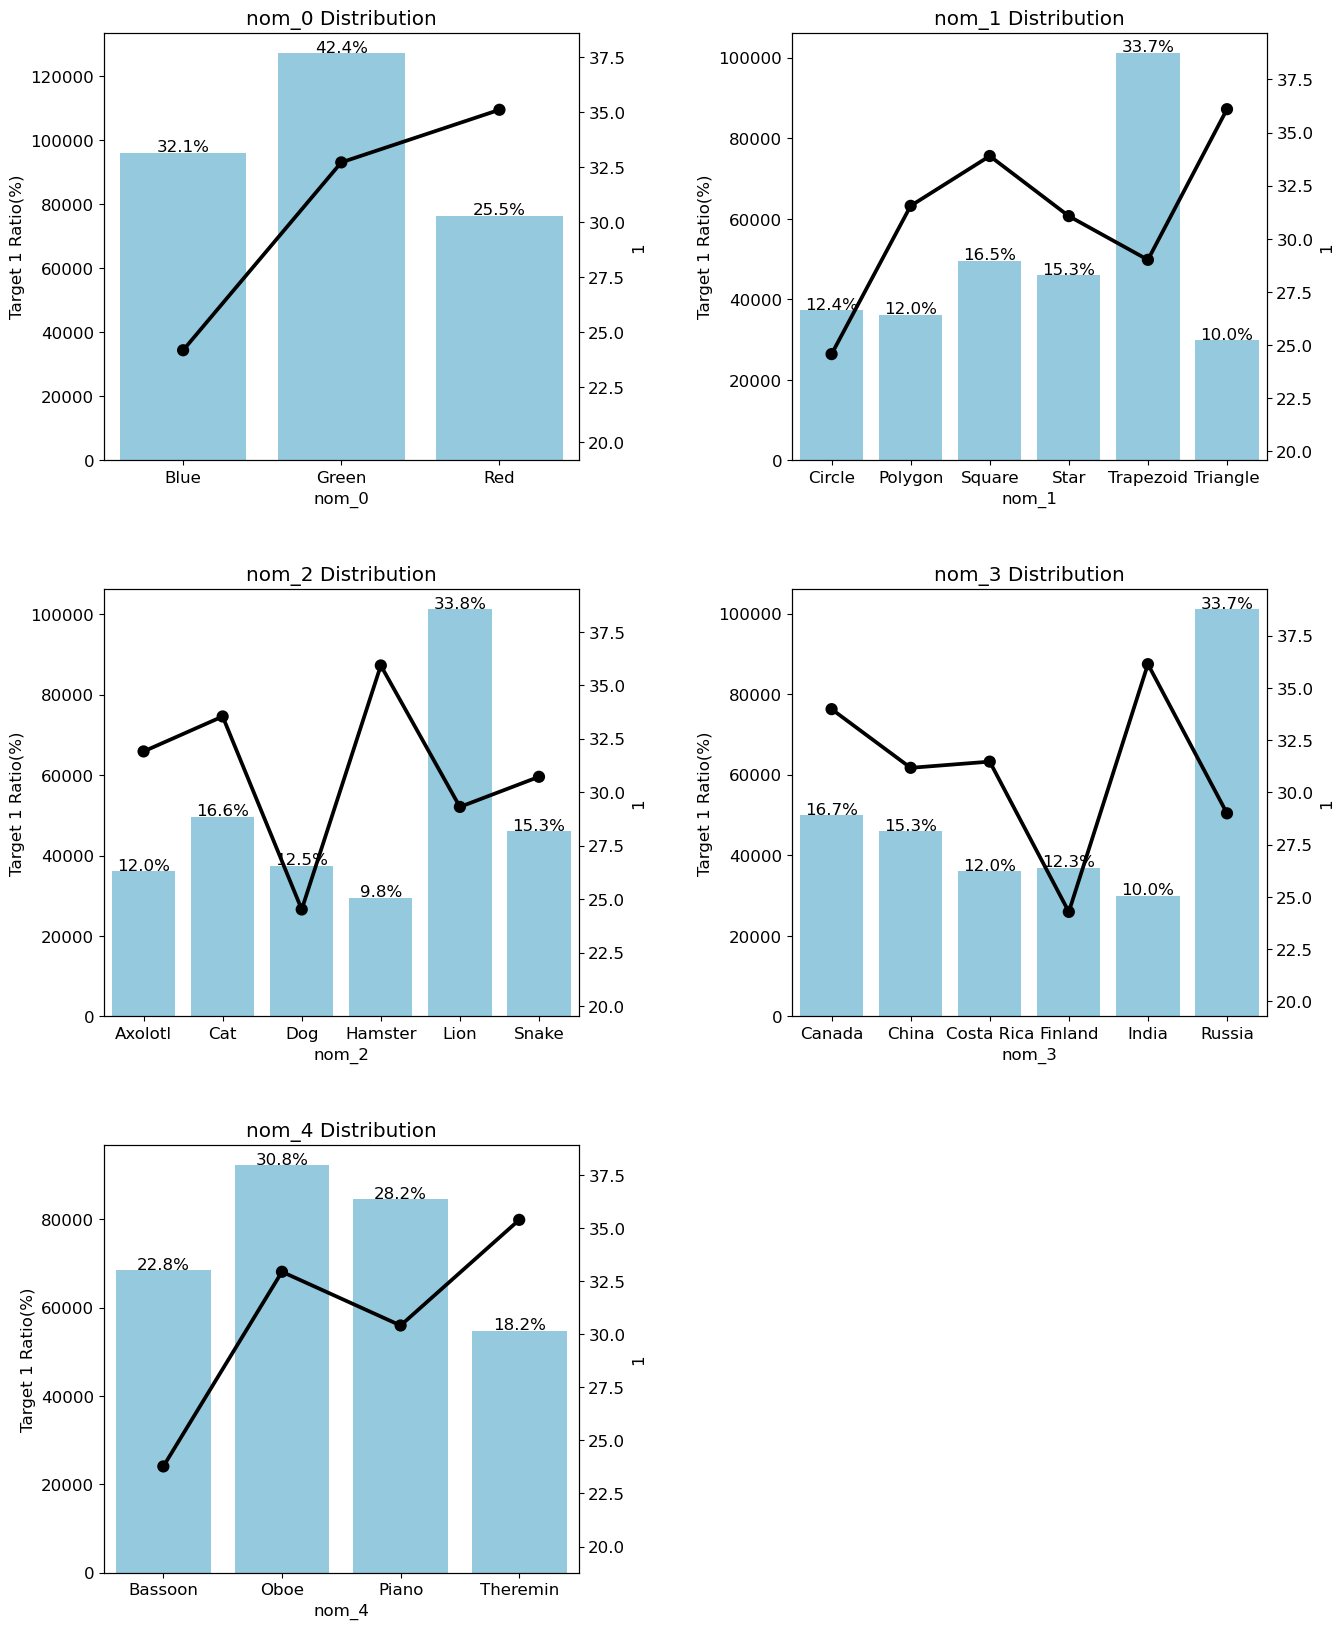

In [32]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
plot_cat_dist_with_true_ratio(train, nom_features, num_rows = 3, num_cols = 2)

- 모든 피처 별 고윳값 별 타깃이 1인 것의 비율이 다르므로 모든 피처 제거하지 않는 것으로 판단

##### 순서형 피처 분포

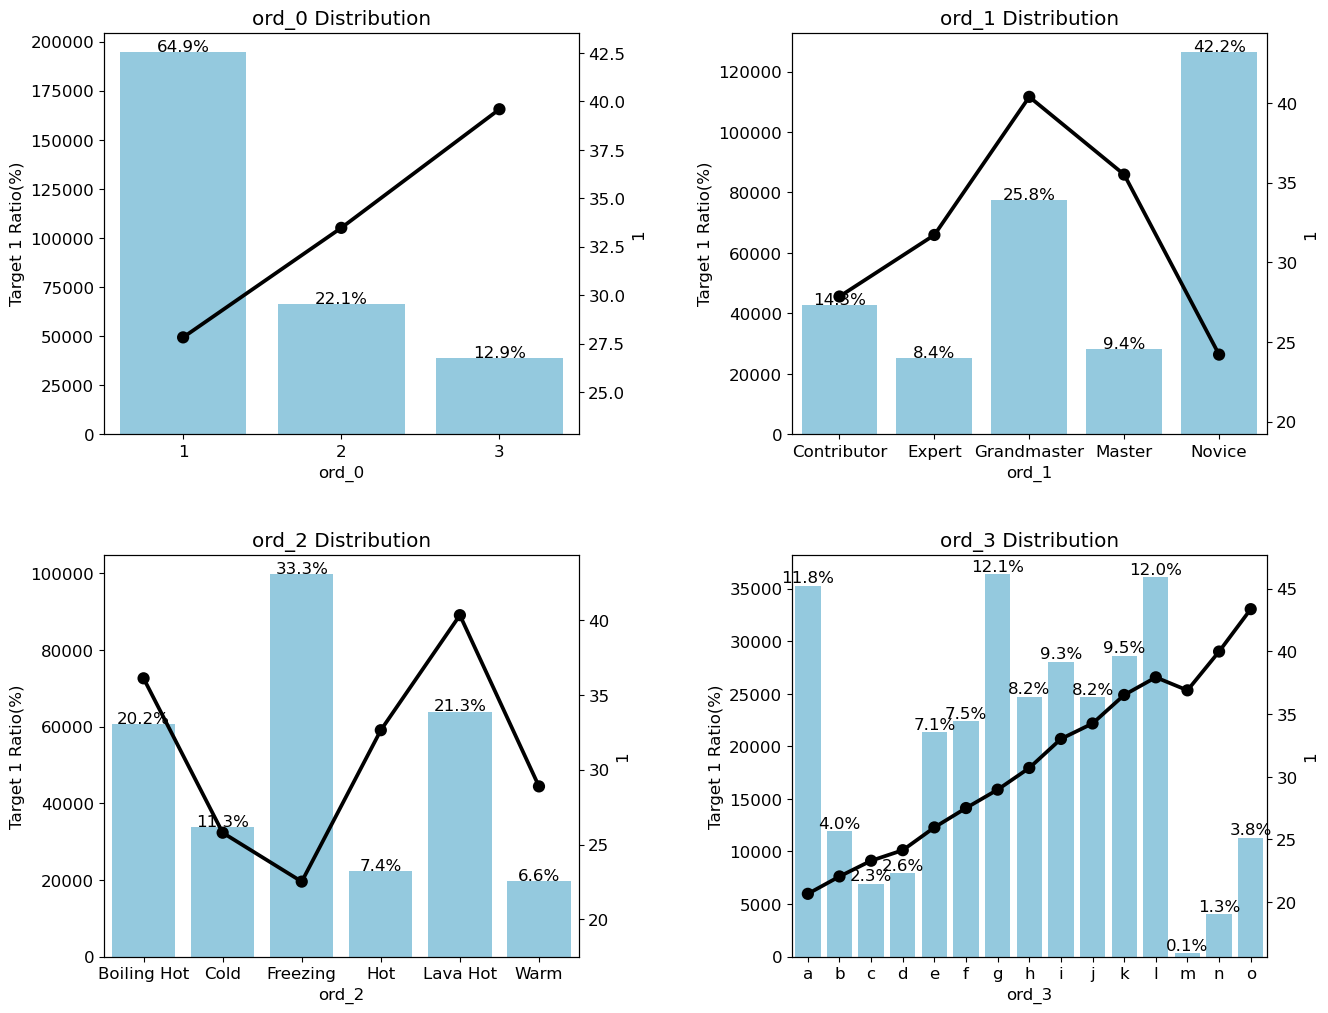

In [33]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
plot_cat_dist_with_true_ratio(train, ord_features, num_rows = 2, num_cols = 2, size = (15, 12))

In [34]:
from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 범주형 데이터를 순서 지정해주기
ord_1_dtype = CategoricalDtype(categories = ord_1_value, ordered = True)
ord_2_dtype = CategoricalDtype(categories = ord_2_value, ordered = True)

train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

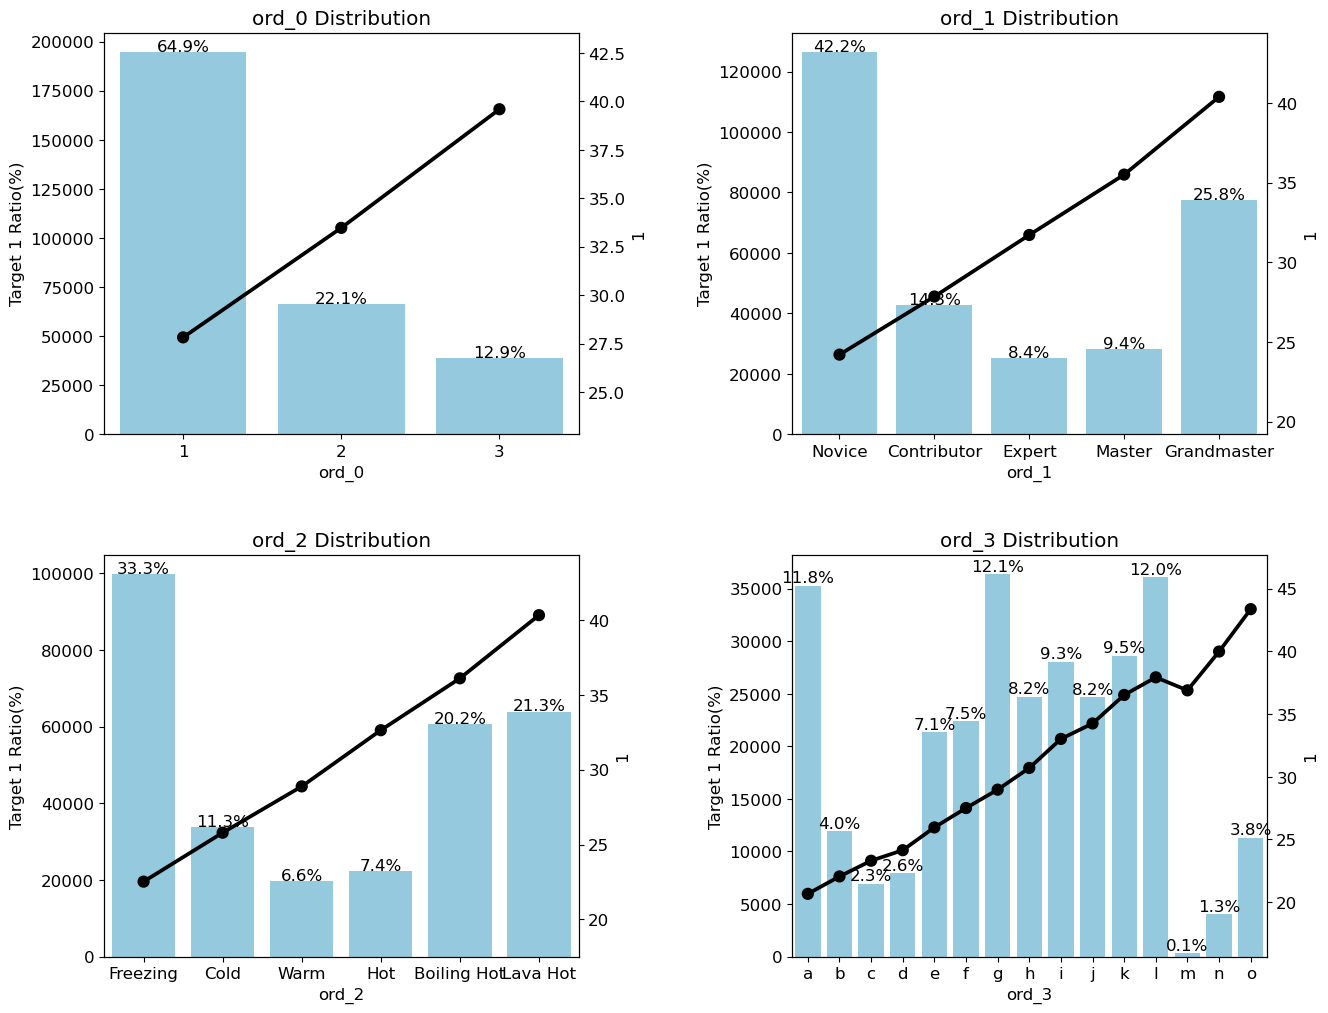

In [35]:
plot_cat_dist_with_true_ratio(train, ord_features, num_rows = 2, num_cols = 2, size = (15, 12))

- 숫자 크기, 알파벳 크기, 지정된 순서대로 타깃값 1의 비율이 증가

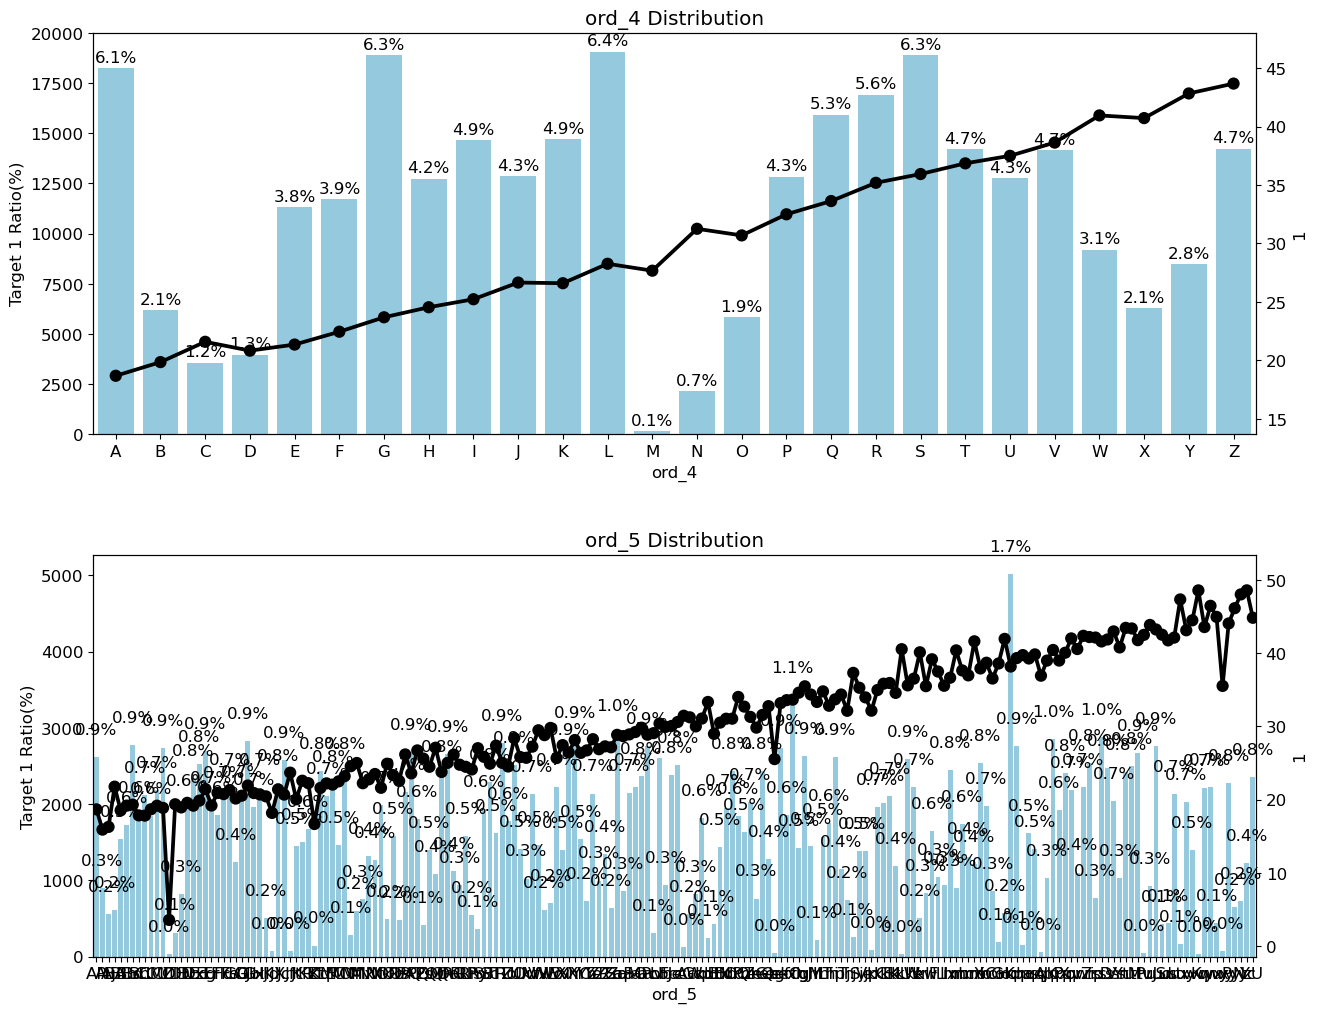

In [36]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'], num_rows = 2, num_cols = 1, size = (15, 12))

- ord_4, ord_5 모두 고윳값 순서대로 타깃값이 1인 비율 증가
- 순서형 피처는 모두 타깃값에 영향을 주는 것으로 판단. 피처 제거하지 않음

##### 날짜 피처 분포

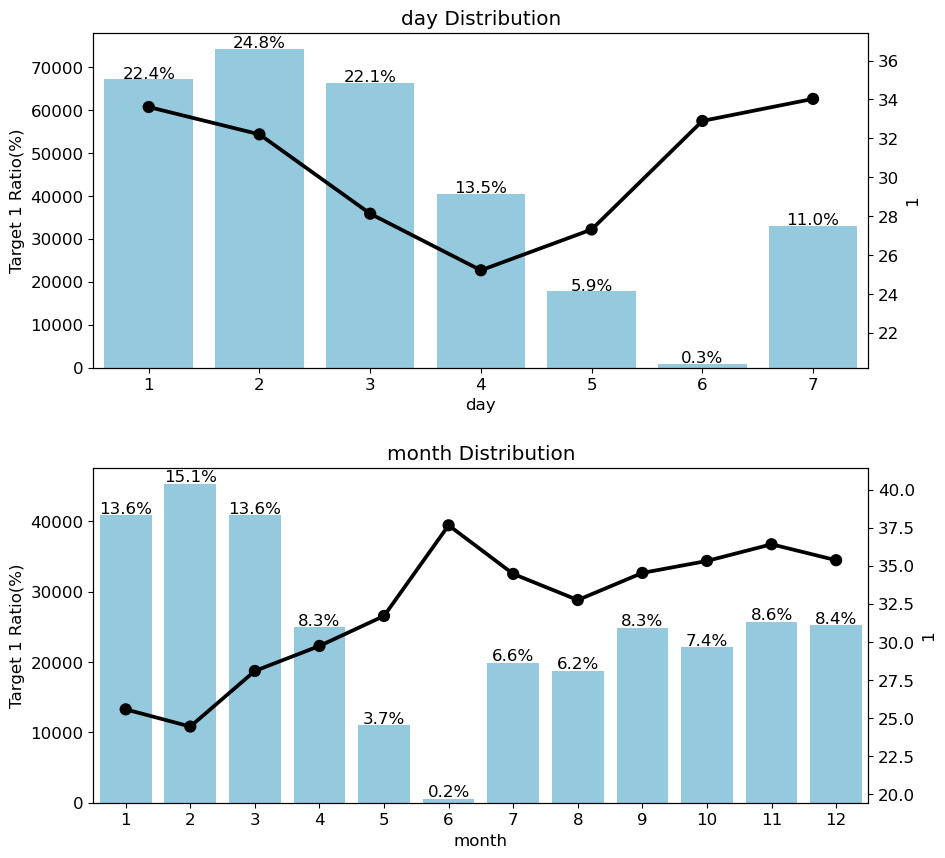

In [37]:
data_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, data_features, num_rows = 2, num_cols = 1, size = (10, 10))

- day : 요일을 의미하는 것으로 추측, 1->4: 1의 비율 감소, 4-> 7: 1의 비율 증가
- month : day 피처와 반대 양상
- 12월과 1월의 차이는 가까우나 숫자로 보면 11차이 발생
- 매년, 매월, 매주, 매일 반복되는 데이터를 순환형 데이터라 부르는데 이는 삼각함수를 사용해 인코딩하면 문제 해결 가능

### 7.3 베이스라인 모델

In [49]:
import pandas as pd

data_path = 'C:/Users/hyebin.hyebin/Desktop/python/kaggle_dataset/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv', index_col = 'id')
test = pd.read_csv(data_path + 'test.csv', index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col = 'id')

#### 7.3.1 피처 엔지니어링

##### 데이터 합치기

In [50]:
all_data = pd.concat([train, test])
all_data = all_data.drop('target', axis = 1)
all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1


##### 원-핫 인코딩

In [51]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
all_data_encoded = encoder.fit_transform(all_data)

##### 데이터 나누기

In [52]:
num_train = len(train)

X_train = all_data_encoded[:num_train]
X_test = all_data_encoded[num_train:]

y = train['target']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size = 0.1, stratify = y, random_state = 10) # stratify : 타깃값 y를 같은 비율로 훈련, 테스트 데이터에 분배

#### 7.3.2 모델 훈련

In [54]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 1000, random_state = 42) # max_iter : 모델의 회귀 계수를 업데이트하는 반복 횟수
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

#### 7.3.3 모델 성능 검증

In [55]:
logistic_model.predict_proba(X_valid) # predict : 0인지 1인지 예측, predict_proba : 타깃값이 될 확률 예측

array([[0.23273456, 0.76726544],
       [0.91424094, 0.08575906],
       [0.8301854 , 0.1698146 ],
       ...,
       [0.24871011, 0.75128989],
       [0.49441224, 0.50558776],
       [0.95657757, 0.04342243]])

In [56]:
logistic_model.predict(X_valid)

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [57]:
y_valid_preds = logistic_model.predict_proba(X_valid)[:, 1] # 타깃값이 1일 확률 저장

In [58]:
from sklearn.metrics import roc_auc_score # 평가점수인 ROC AUC 점수 계산 

roc_auc = roc_auc_score(y_valid, y_valid_preds)
print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

검증 데이터 ROC AUC : 0.7965


#### 7.3.4 예측 및 결과 제출

In [59]:
y_preds = logistic_model.predict_proba(X_test)[:, 1]

In [60]:
submission['target'] = y_preds
submission.to_csv(data_path + 'submission.csv')

### 7.4 성능 개선 1

In [61]:
import pandas as pd

data_path = 'C:/Users/hyebin.hyebin/Desktop/python/kaggle_dataset/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv', index_col = 'id')
test = pd.read_csv(data_path + 'test.csv', index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col = 'id')

#### 7.4.1 피처 엔지니어링 1 피처 맞춤 인코딩

##### 데이터 합치기

In [62]:
all_data = pd.concat([train, test])
all_data = all_data.drop('target', axis = 1)

##### 이진 피처 인코딩
- bin_0, bin_1, bin_2 : 0, 1로 구성되어 있어 피처 인코딩 x
- bin_3, bin_4 : 피처 인코딩 수행

In [63]:
all_data['bin_3'] = all_data['bin_3'].map({'F': 0, 'T': 1})
all_data['bin_4'] = all_data['bin_4'].map({'N': 0, 'Y': 1})

##### 순서형 피처 인코딩

In [64]:
ord1dict = {'Novice': 0, 'Contributor': 1, 'Expert': 2, 'Master': 3, 'Grandmaster': 4}
ord2dict = {'Freezing': 0, 'Cold': 1, 'Warm': 2, 'Hot': 3, 'Boiling Hot': 4, 'Lava Hot': 5}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

In [65]:
from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3', 'ord_4', 'ord_5']

ord_encoder = OrdinalEncoder()
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

for feature, categories in zip(ord_345, ord_encoder.categories_):
    print(feature)
    print(categories)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

In [67]:
all_data[ord_345]

,ord_3,ord_4,ord_5
id,,,
0,7.0,3.0,136.0
1,0.0,0.0,93.0
2,7.0,17.0,31.0
3,8.0,3.0,134.0
4,0.0,17.0,158.0
...,...,...,...
499995,9.0,0.0,25.0
499996,5.0,18.0,17.0
499997,6.0,21.0,66.0


##### 명목형 피처 인코딩

In [68]:
nom_features = ['nom_' + str(i) for i in range(10)]

In [70]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])

encoded_nom_matrix

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

In [73]:
all_data = all_data.drop(nom_features, axis = 1) # 기존 명목형 피처 삭제

##### 날짜 피처 인코딩

In [74]:
date_features = ['day', 'month']

encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])
all_data = all_data.drop(date_features, axis = 1)

encoded_date_matrix

<500000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

#### 7.4.2 피처 엔지니어링 2 피처 스케일링
- 서로 다른 피처들의 값의 범위가 일치하도록 조정하는 작업

##### 순서형 피처 스케일링

In [75]:
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_' + str(i) for i in range(6)] # 순서형 피처
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

##### 인코딩 및 스케일링된 피처 합치기
- all_data에는 이진 피처, 순서형 피처가 인코딩 되어 있음
- 명목형 피처는 encoded_nom_matrix에, 날짜 피처는 encoded_date_matrix에 저장되어 있음
- all_data를 CSR 형식으로 바꾸어 합쳐줌

In [76]:
from scipy import sparse

# 인코딩 및 스케일링된 피처 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data), encoded_nom_matrix, encoded_date_matrix], format = 'csr') 

In [77]:
all_data_sprs

<500000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 9163718 stored elements in Compressed Sparse Row format>

##### 데이터 나누기

In [78]:
num_train = len(train)

X_train = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target']

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size = 0.1, stratify = y, random_state = 10)

#### 7.4.3 하이퍼파라미터 최적화

In [81]:
%%time 
# 해당 셀 실행 후 소요시간을 출력해주는 기능

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

# 하이퍼파라미터 값 목록
lr_params = {'C': [0.1, 0.125, 0.2], 'max_iter': [800, 900, 1000], 'solver': ['liblinear'], 'random_state': [42]}

# 그리드서치 객체 생성
gridsearch_logistic_model = GridSearchCV(estimator = logistic_model, param_grid = lr_params, scoring = 'roc_auc', cv = 5)

# 그리드서치 수행
gridsearch_logistic_model.fit(X_train, y_train)

print('최적 하이퍼파라미터: ', gridsearch_logistic_model.best_params_)

최적 하이퍼파라미터:  {'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}
CPU times: total: 7min 42s
Wall time: 4min 15s


#### 7.4.4 모델 성능 검증

In [82]:
y_valid_preds = gridsearch_logistic_model.predict_proba(X_valid)[:, 1]

In [83]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

검증 데이터 ROC AUC : 0.8045


#### 7.4.5 예측 및 결과 제출

In [85]:
y_preds = gridsearch_logistic_model.best_estimator_.predict_proba(X_test)[:, 1]

submission['target'] = y_preds
submission.to_csv(data_path + 'submission2.csv')